In [1]:
# Dependencies
import json
import requests
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

from pprint import pprint
 
# Output File (CSV)
output_data_file = "output_data/cities.csv"
    
# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [2]:
# List for holding lat_lngs and cities
size_random = 1500

lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=lat_range[0],high=lat_range[1],size=size_random)
lngs = np.random.uniform(low=lng_range[0],high=lng_range[1],size=size_random)
coords = zip(lats,lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in coords:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

601

In [3]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

list_dict = []
i = 0
for city in cities:
    query = f"{url}appid={api_key}&units={units}&q={city}"
    
    try:
        data = requests.get(query).json()
        i += 1
        print(f'Processing record {i} | {data["name"]}')
        
        data_dict = {
            "City": data["name"],
            "Cloudiness": data["clouds"]["all"],
            "Country": data["sys"]["country"],
            "Date": data["sys"]["sunrise"],
            "Humidity": data["main"]["humidity"],
            "Lat": data["coord"]["lat"],
            "Lng": data["coord"]["lon"],
            "Max Temp": data["main"]["temp_max"],
            "Wind Speed": data["wind"]["speed"]
        }
        list_dict.append(data_dict)
    except:
        print(f'{city} not found. Skipping...')

Processing record 1 | Albany
Processing record 2 | Port Elizabeth
Processing record 3 | Atuona
Processing record 4 | Touros
Processing record 5 | Puerto Ayora
Processing record 6 | Vaini
Processing record 7 | Santa Cruz de la Palma
Processing record 8 | Bluff
Processing record 9 | Parintins
Processing record 10 | Arraial do Cabo
Processing record 11 | Goedereede
Processing record 12 | Marzuq
Processing record 13 | Sungairaya
Processing record 14 | Neklyudovo
Processing record 15 | Jamestown
Processing record 16 | Whitianga
Processing record 17 | Rikitea
Processing record 18 | Gornyy
Processing record 19 | Evensk
Processing record 20 | Busselton
Processing record 21 | Kieta
Processing record 22 | Qaanaaq
Processing record 23 | Iquitos
Processing record 24 | Severo-Kurilsk
Processing record 25 | Thompson
Processing record 26 | Cape Town
bur gabo not found. Skipping...
Processing record 28 | Kodiak
Processing record 29 | Mataura
Processing record 30 | Matara
Processing record 31 | Clyde R

Processing record 249 | Nome
Processing record 250 | Davila
Processing record 251 | Bodden Town
Processing record 252 | Dovolnoye
Processing record 253 | Fortuna
Processing record 254 | Los Llanos de Aridane
Processing record 255 | Ribeira Grande
Processing record 256 | Fukue
Processing record 257 | Gorontalo
Processing record 258 | Narsaq
Processing record 259 | Kiama
Processing record 260 | Tulum
Processing record 261 | Opuwo
bargal not found. Skipping...
Processing record 263 | Ueda
kyra not found. Skipping...
Processing record 265 | Elko
Processing record 266 | Mimarsinan
Processing record 267 | Pishin
Processing record 268 | Nivala
Processing record 269 | Upata
Processing record 270 | Norsup
tasbuget not found. Skipping...
belushya guba not found. Skipping...
Processing record 273 | Daru
Processing record 274 | Tunceli
bafra not found. Skipping...
zlatoustovsk not found. Skipping...
acin not found. Skipping...
Processing record 278 | Marquette
Processing record 279 | Cam Ranh
Proc

Processing record 501 | Llanes
Processing record 502 | Cabedelo
Processing record 503 | Caravelas
Processing record 504 | Masallatah
Processing record 505 | Sibu
Processing record 506 | Boa Vista
Processing record 507 | Casablanca
Processing record 508 | Lenina
Processing record 509 | Okahandja
Processing record 510 | Caucaia
Processing record 511 | Broken Hill
Processing record 512 | Moss Vale
Processing record 513 | Muros
Processing record 514 | Tilichiki
Processing record 515 | Ambilobe
Processing record 516 | Namtsy
Processing record 517 | Collie
Processing record 518 | Turner
Processing record 519 | Behshahr
Processing record 520 | Wana
Processing record 521 | Lazaro Cardenas
kytlym not found. Skipping...
Processing record 523 | Dawlatabad
Processing record 524 | Skjervoy
Processing record 525 | Ardesen
Processing record 526 | Ukiah
cucer not found. Skipping...
Processing record 528 | Neuquen
Processing record 529 | Necochea
Processing record 530 | Padang
Processing record 531 | L

In [4]:
df_city_weather = pd.DataFrame(list_dict)
df_city_weather.count()

City          537
Cloudiness    537
Country       537
Date          537
Humidity      537
Lat           537
Lng           537
Max Temp      537
Wind Speed    537
dtype: int64

In [5]:
df_city_weather.head()
df_city_weather.to_csv(output_data_file)

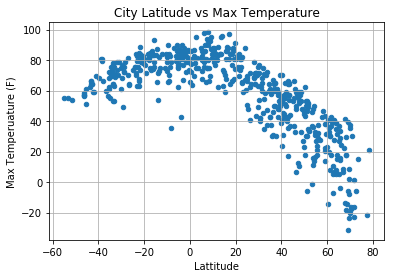

In [6]:
df_city_weather.plot(kind="scatter",x="Lat",y="Max Temp",grid=True,
                    figsize=(6,4),
                    title="City Latitude vs Max Temperature")
plt.xlabel("Lattitude")
plt.ylabel("Max Temperuature (F)")
# Save the figure
plt.savefig("output_data/Temperature.png")
plt.show()

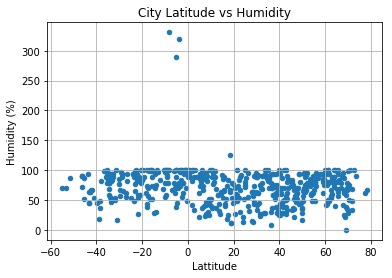

In [7]:
df_city_weather.plot(kind="scatter",x="Lat",y="Humidity",grid=True,
                    figsize=(6,4),
                    title="City Latitude vs Humidity")
plt.xlabel("Lattitude")
plt.ylabel("Humidity (%)")
plt.savefig("output_data/Humidity.png")
plt.show()

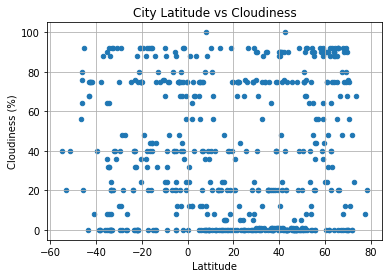

In [8]:
df_city_weather.plot(kind="scatter",x="Lat",y="Cloudiness",grid=True,
                    figsize=(6,4),
                    title="City Latitude vs Cloudiness")
plt.xlabel("Lattitude")
plt.ylabel("Cloudiness (%)")
plt.savefig("output_data/Cloudiness.png")
plt.show()

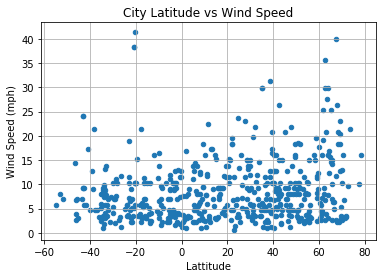

In [9]:
df_city_weather.plot(kind="scatter",x="Lat",y="Wind Speed",grid=True,
                    figsize=(6,4),
                    title="City Latitude vs Wind Speed")
plt.xlabel("Lattitude")
plt.ylabel("Wind Speed (mph)")
plt.savefig("output_data/WindSpeed.png")
plt.show()